In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np # math
import matplotlib.pyplot as plt # graphs and plots
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.dates as mdates
from src.utils.profiles_from_schedule_new import SimParam # class for show-up generator
from src.simfunc.KIX_T1d_CUSBD_new import Pax, Simulation , minutes_to_hms# classes for simulation
import seaborn as sns


In [2]:
simparam = SimParam()
path_to_6k_sched = (
    r"/home/antoine/projects/"
    "KAPpaxsim/data/"
    "processed/Schedule (30th terminal peak, 6000 pax)_PROCESSED.xlsx"
)
simparam.schedule_from_path(path_to_6k_sched)
simparam.schedule_cleanup()
simparam.schedule_filter()
simparam.show_up_from_file()
simparam.assign_flight_show_up_category_default()
# simparam.plot_show_up_categories_profiles()
# simparam.schedule['PAX_SUM FC'] = 10
simparam.assign_show_up()
# simparam.plot_df_Pax()
simparam.assign_check_in()

In [3]:
# simparam.df_Counters['total'].plot()

In [4]:
simparam.dct_resource = {
    'kiosk' : 92,
    'security' : 200,
    'CUSBD' : 50,
}

simparam.dct_processes = {
    'kiosk' : 70,
    'security': 1,
    'CUSBD': 60,
    'checkin': 70,
}

mask_CUSBD = simparam.df_Pax['Airline']=='NEW'
simparam.df_Pax.loc[mask_CUSBD,'pax_type']='CUSBD'

mask_tradi = mask_CUSBD == False
simparam.df_Pax.loc[mask_tradi,'pax_type']='tradi'

# Need to make a pretty control for :
#     - pax types from simparam.df_Pax
#     - pax journeys by pax types
#     - plotting process list_all
#     - FREQ and WIN
#     - how long before STD pax should wait
# maybe store the processes sequence in df_Pax and go from there?

In [6]:
simulation = Simulation(simparam)
simulation.generate_checkin()
simulation.generate_pax()
simulation.run(end_time=1440)

Simulation running...: 100%|██████████| 1439/1439 [03:06<00:00,  7.70it/s]


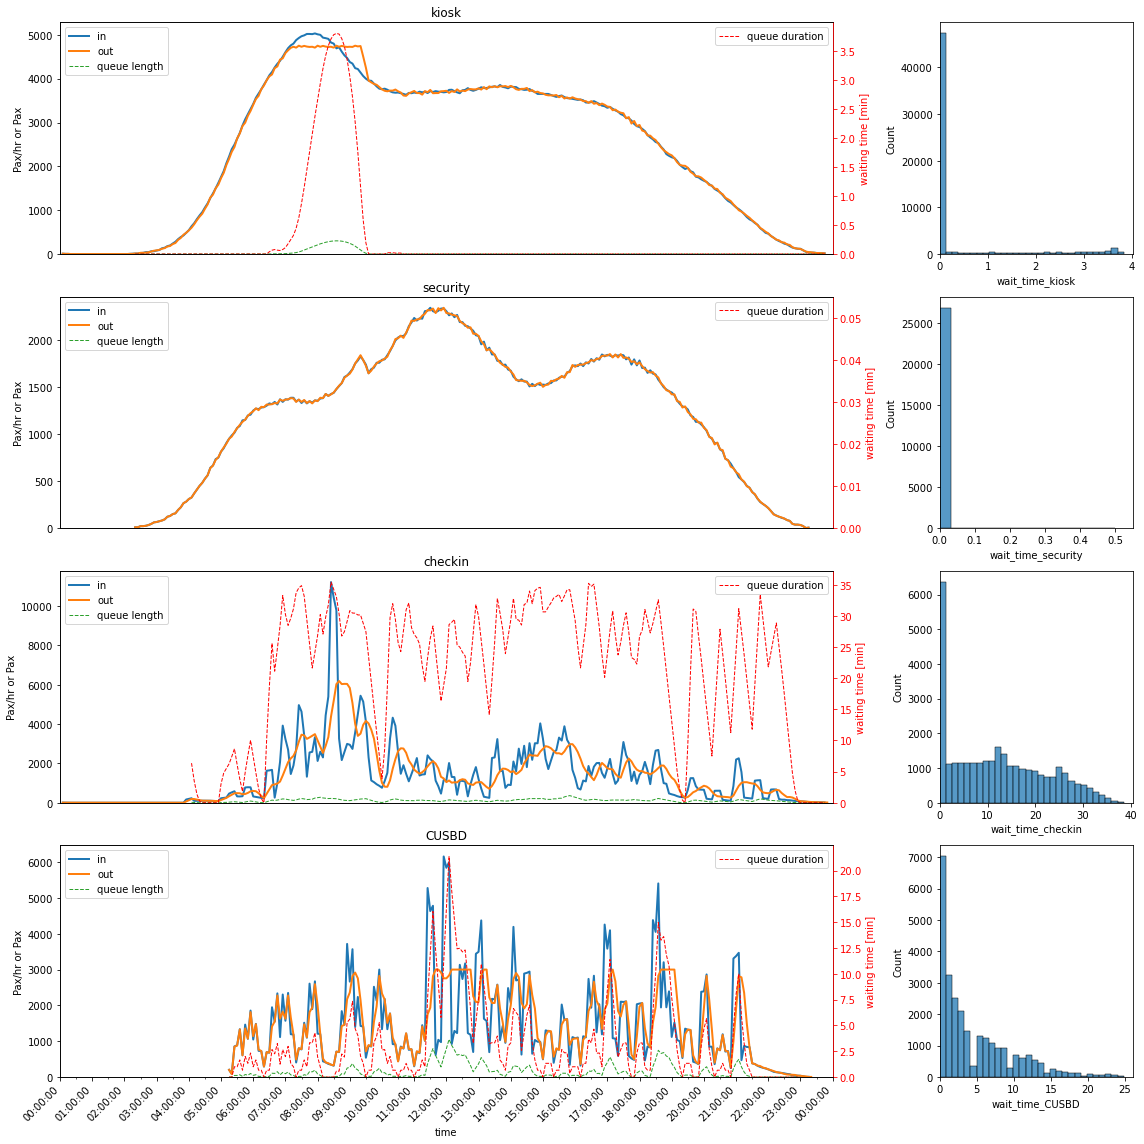

In [71]:
simulation.format_df_result()
simulation.plot_result()

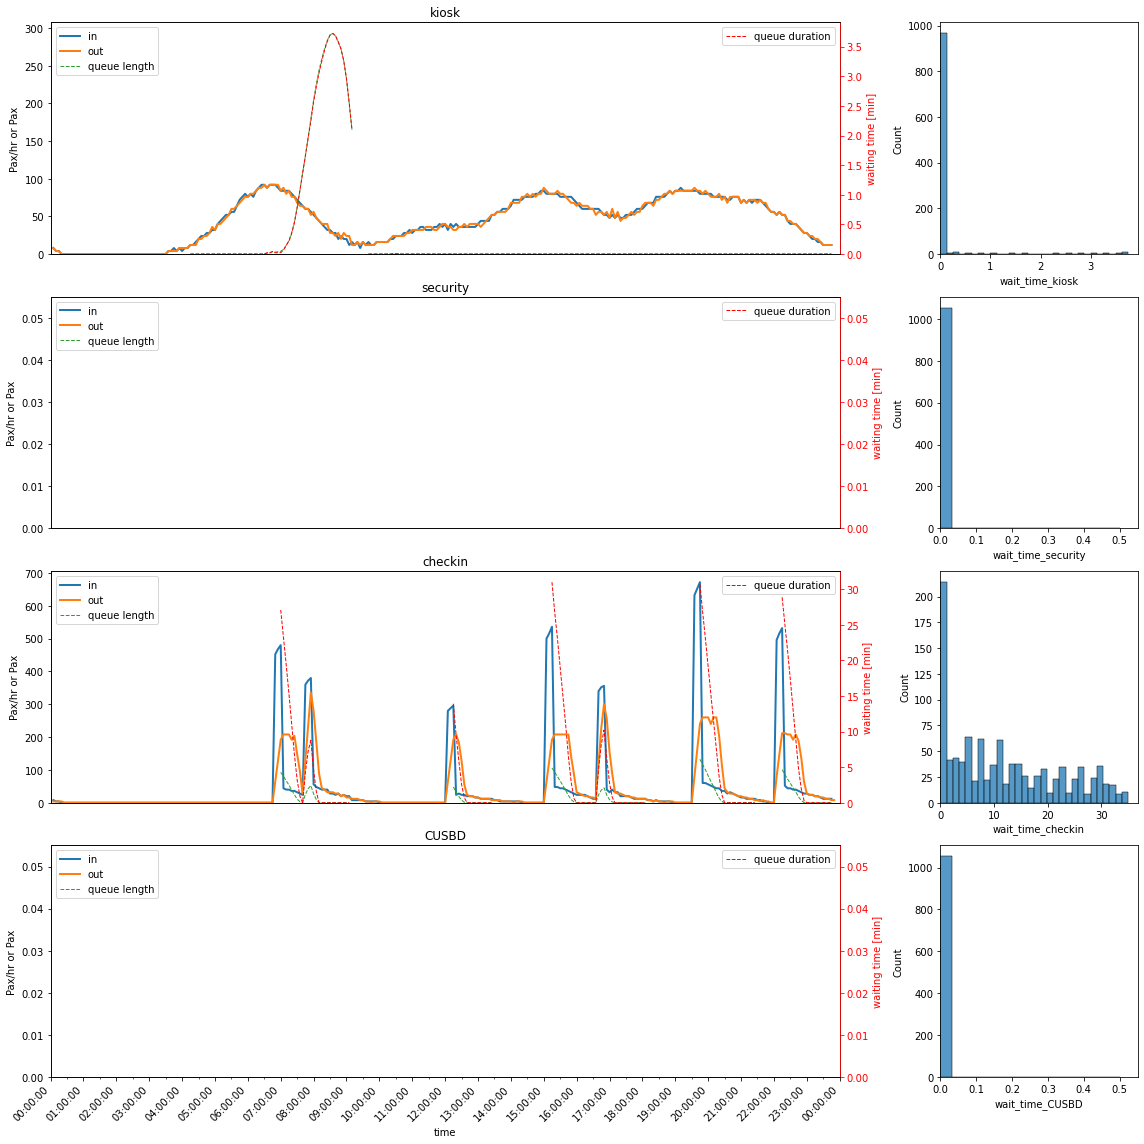

In [73]:
simulation.format_df_result(filter_airline='JAL')
simulation.plot_result()